# Linear Regression


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

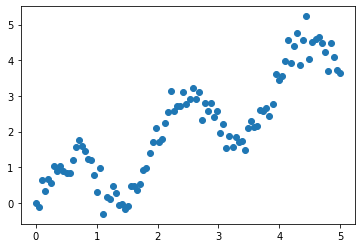

In [5]:
plt.scatter(x,y)

#### nonlinear

In [6]:
regr_lin = LinearRegression()

In [7]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [8]:
regr_lin.fit(X,y)

LinearRegression()

0.5484036026190161


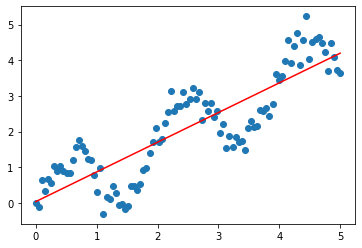

In [9]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [10]:
print(x.shape)

(100,)


In [11]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [12]:
regr_poly = LinearRegression()

In [13]:
regr_poly.fit(X_poly, y)

LinearRegression()

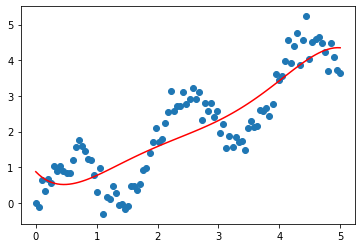

In [14]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [17]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.77400443  2.69081876 -1.27361005  0.27217961 -0.02106673]
interception:  0.8730196228237892


In [18]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #100*5 * 5*1

array([0.87301962, 0.79012476, 0.71999731, 0.66171552, 0.61439852,
       0.57720541, 0.5493345 , 0.53002243, 0.51854335, 0.51420812,
       0.51636345, 0.52439105, 0.53770686, 0.55576016, 0.57803278,
       0.60403824, 0.63332092, 0.66545528, 0.70004495, 0.73672196,
       0.77514588, 0.81500301, 0.85600552, 0.89789066, 0.94041988,
       0.98337805, 1.02657258, 1.06983263, 1.11300826, 1.1559696 ,
       1.19860603, 1.24082532, 1.28255285, 1.32373072, 1.36431697,
       1.40428472, 1.44362135, 1.48232765, 1.52041704, 1.55791468,
       1.59485666, 1.63128919, 1.66726775, 1.70285625, 1.73812623,
       1.77315601, 1.80802983, 1.84283708, 1.87767144, 1.91263003,
       1.9478126 , 1.98332071, 2.01925688, 2.05572376, 2.0928233 ,
       2.13065594, 2.16931976, 2.20890963, 2.24951643, 2.29122618,
       2.33411922, 2.37826937, 2.42374312, 2.47059879, 2.5188857 ,
       2.56864331, 2.61990045, 2.67267444, 2.72697027, 2.78277978,
       2.84008082, 2.89883643, 2.95899399, 3.02048441, 3.08322

In [19]:
regr_poly.predict(X_poly)

array([0.87301962, 0.79012476, 0.71999731, 0.66171552, 0.61439852,
       0.57720541, 0.5493345 , 0.53002243, 0.51854335, 0.51420812,
       0.51636345, 0.52439105, 0.53770686, 0.55576016, 0.57803278,
       0.60403824, 0.63332092, 0.66545528, 0.70004495, 0.73672196,
       0.77514588, 0.81500301, 0.85600552, 0.89789066, 0.94041988,
       0.98337805, 1.02657258, 1.06983263, 1.11300826, 1.1559696 ,
       1.19860603, 1.24082532, 1.28255285, 1.32373072, 1.36431697,
       1.40428472, 1.44362135, 1.48232765, 1.52041704, 1.55791468,
       1.59485666, 1.63128919, 1.66726775, 1.70285625, 1.73812623,
       1.77315601, 1.80802983, 1.84283708, 1.87767144, 1.91263003,
       1.9478126 , 1.98332071, 2.01925688, 2.05572376, 2.0928233 ,
       2.13065594, 2.16931976, 2.20890963, 2.24951643, 2.29122618,
       2.33411922, 2.37826937, 2.42374312, 2.47059879, 2.5188857 ,
       2.56864331, 2.61990045, 2.67267444, 2.72697027, 2.78277978,
       2.84008082, 2.89883643, 2.95899399, 3.02048441, 3.08322

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [20]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [21]:
sigma = 0.3

In [22]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [23]:
regr_rbf = LinearRegression()

In [24]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

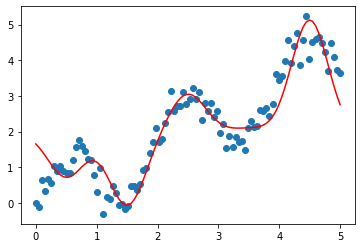

In [25]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [26]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.23934091 -2.03089213  1.09404733  0.12889263  3.16757146]
interception:  1.9610827627518246


#### Comparison

In [27]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

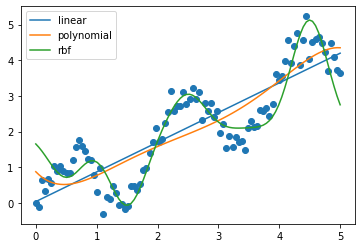

In [28]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [29]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5484036026190161


In [30]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5013046207499494


In [31]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.26304024393689335
